# Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import xgboost
from xgboost import XGBClassifier

from events_to_pd import events_to_pd
from gen_feats import gen_feats
from events_to_df import events_to_df

# Load data

In [5]:
%%time
bkg_path = "bb1/run_a0.txt"
sig_path = "dark1/run_a0.txt"
bkg_path_test = "bb1/run_a0.txt"
sig_path_test = "dark1/run_a0.txt"

max_ev = int(1e4)

bkg, bkg_j = events_to_pd(bkg_path,max_ev)
sig, sig_j = events_to_pd(sig_path,max_ev)
bkg_test, bkg_j_test = events_to_pd(bkg_path_test,max_ev)
sig_test, sig_j_test = events_to_pd(sig_path_test,max_ev)

print("num Background train jets = {}".format(len(bkg_j)))
print("num Signal train jets = {}".format(len(sig_j)))
print("num Background test jets = {}".format(len(bkg_j_test)))
print("num Signal test jets = {}".format(len(sig_j_test)))

num Background train jets = 5017
num Signal train jets = 3954
num Background test jets = 5017
num Signal test jets = 3954
Wall time: 22.9 s


In [11]:
%%time
bkg.to_pickle("data/bkg")
bkg_j.to_pickle("data/bkg_j")
sig.to_pickle("data/sig")
sig_j.to_pickle("data/sig_j")
bkg_test.to_pickle("data/bkg_test")
bkg_j_test.to_pickle("data/bkg_j_test")
sig_test.to_pickle("data/sig_test")
sig_j_test.to_pickle("data/sig_j_test")

Wall time: 19.9 ms


In [2]:
%%time
bkg = pd.read_pickle("data/bkg")
bkg_j = pd.read_pickle("data/bkg_j")
sig = pd.read_pickle("data/sig")
sig_j = pd.read_pickle("data/sig_j")
bkg_test = pd.read_pickle("data/bkg_test")
bkg_j_test = pd.read_pickle("data/bkg_j_test")
sig_test = pd.read_pickle("data/sig_test")
sig_j_test = pd.read_pickle("data/sig_j_test")

Wall time: 1.16 s


In [8]:
bkg.head()

,Event,Jet,T/T,PT,Eta,Phi,DeltaR,PID,D0/Ehad,DZ/Eem
0,1,1,1,0.721727,2.17945,-1.91605,0.583878,211,0.166059,-0.448286
1,1,1,1,5.712120,1.33382,-1.71437,0.319067,211,-0.074500,0.100887
2,1,1,1,2.000430,1.24364,-1.41664,0.595147,-211,0.124713,0.022505
3,1,1,1,5.861170,1.18350,-1.63857,0.486338,321,-0.040540,0.007359
4,1,1,1,3.118520,1.57123,-2.05637,0.161921,211,-0.070787,0.109813


In [4]:
bkg_j.head()

,Event,Jet,PT,Eta,Phi,MET
0,1,1,159.872,1.595910,-1.896340,52.9130
1,6,2,148.807,0.574635,-1.236440,9.1650
2,9,1,158.883,0.687444,2.426350,20.0738
3,12,2,147.354,2.942360,0.384306,17.9465
4,14,2,146.740,-0.491299,-0.984425,12.6880


# Create jet features

In [6]:
%%time
n_constits = 30

bkg, bkg_j = gen_feats(bkg, bkg_j, label=0, n_constits=n_constits, boost_and_shift=True)
sig, sig_j = gen_feats(sig, sig_j, label=1, n_constits=n_constits, boost_and_shift=True)

bkg_test, bkg_j_test = gen_feats(bkg_test, bkg_j_test, label=0, n_constits=n_constits, boost_and_shift=True)
sig_test, sig_j_test = gen_feats(sig_test, sig_j_test, label=1, n_constits=n_constits, boost_and_shift=True)

Wall time: 56.9 s


In [4]:
%%time
bkg.to_pickle("feats/bkg")
bkg_j.to_pickle("feats/bkg_j")
sig.to_pickle("feats/sig")
sig_j.to_pickle("feats/sig_j")
bkg_test.to_pickle("feats/bkg_test")
bkg_j_test.to_pickle("feats/bkg_j_test")
sig_test.to_pickle("feats/sig_test")
sig_j_test.to_pickle("feats/sig_j_test")

Wall time: 2.11 s


In [5]:
%%time
bkg = pd.read_pickle("feats/bkg")
bkg_j = pd.read_pickle("feats/bkg_j")
sig = pd.read_pickle("feats/sig")
sig_j = pd.read_pickle("feats/sig_j")
bkg_test = pd.read_pickle("feats/bkg_test")
bkg_j_test = pd.read_pickle("feats/bkg_j_test")
sig_test = pd.read_pickle("feats/sig_test")
sig_j_test = pd.read_pickle("feats/sig_j_test")

Wall time: 795 ms


In [4]:
bkg_j[["Event","Jet","PT","Eta","Phi","mult_track","mult_tower_had" ,"mult_tower_em" ,"maxD0","maxDZ","MET","label"]].head()

,Event,Jet,PT,Eta,Phi,mult_track,mult_tower_had,mult_tower_em,maxD0,maxDZ,MET,label
0,1,1,159.872,1.595910,-1.896340,21,20,29,0.018706,-0.023074,52.91300,0
1,6,2,148.807,0.574635,-1.236440,15,5,19,0.000938,-0.014535,9.16500,0
2,9,1,158.883,0.687444,2.426350,8,2,9,-0.082794,-0.053480,20.07380,0
3,14,2,146.740,-0.491299,-0.984425,17,5,17,0.231922,0.154354,12.68800,0
4,15,2,158.251,-0.161220,2.447950,22,4,12,0.133161,-0.157106,7.54437,0


# Histograms

Wall time: 528 ms


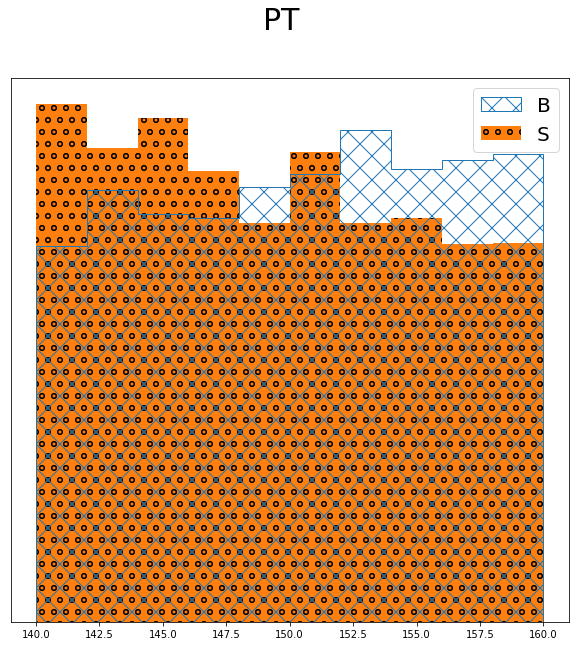

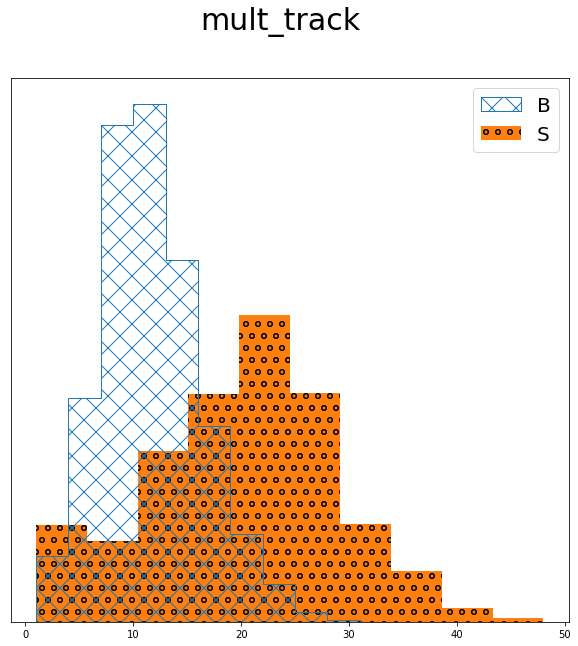

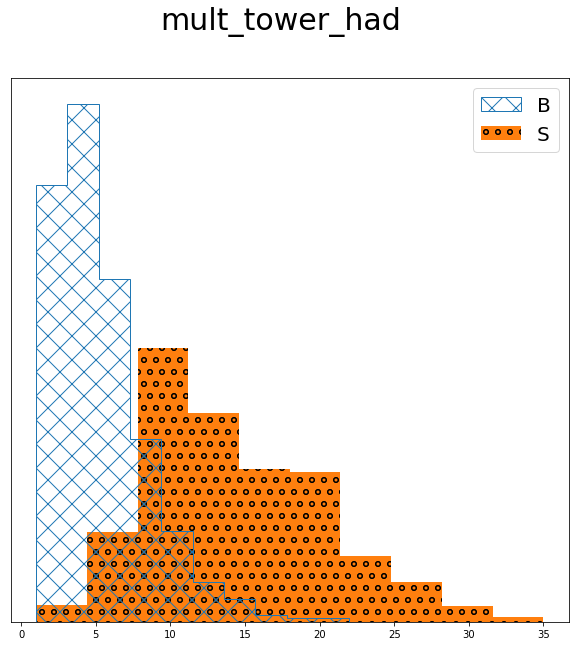

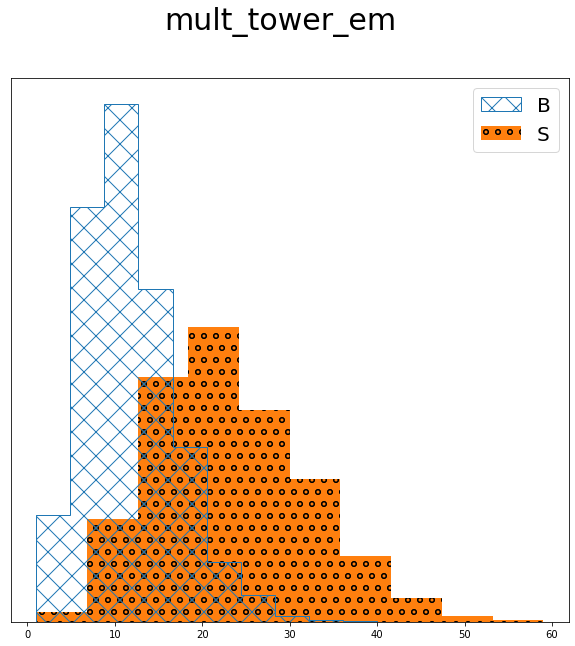

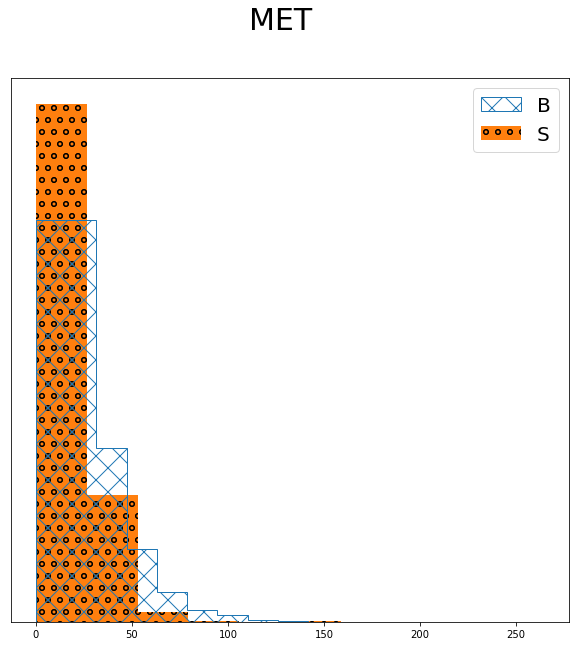

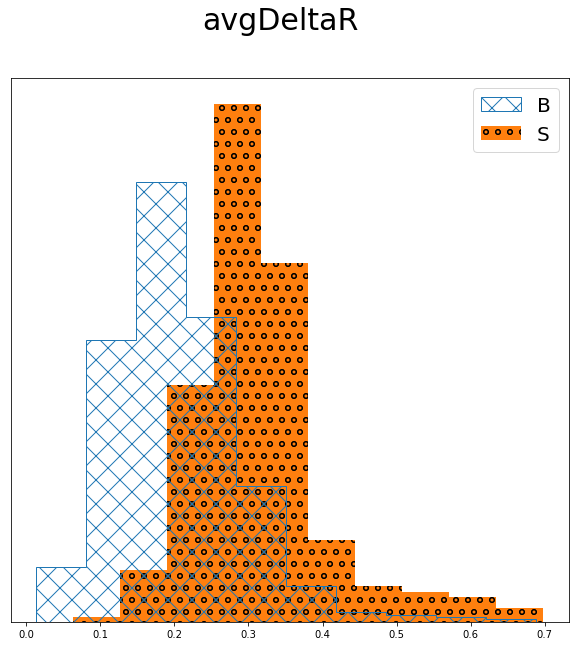

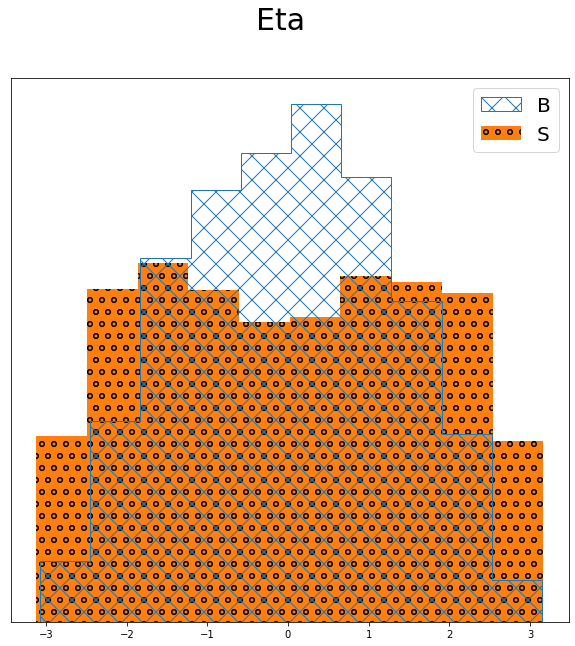

In [11]:
%%time
feats = ["PT","mult_track","mult_tower_had","mult_tower_em","MET", "avgDeltaR","Eta"]

for feat in feats:
    fig, ax = plt.subplots(figsize=(10,10))
    ax.hist(bkg_j[feat],bins=10,histtype="step",hatch="x", density=True);
    ax.hist(sig_j[feat],bins=10,histtype="stepfilled",hatch="o", density=True);
    ax.legend(["B","S"],fontsize=20)
    ax.set_yticks([])
    fig.suptitle(feat, size=30)

In [24]:
bkg_j.columns

Index(['Event', 'Jet', 'PT', 'Eta', 'Phi', 'MET', 'mult_track',
       'mult_tower_had', 'mult_tower_em', 'avgDeltaR', 'PT_track', 'Eta_track',
       'Phi_track', 'DeltaR_track', 'D0_track', 'DZ_track', 'maxD0', 'maxDZ',
       'label'],
      dtype='object')

0.5129212321686996
0.49825127791229484


Text(0.5, 0.98, 'ip')

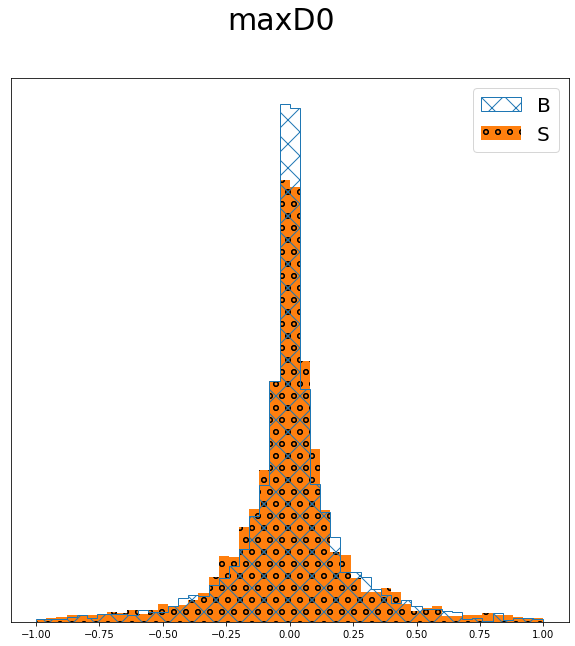

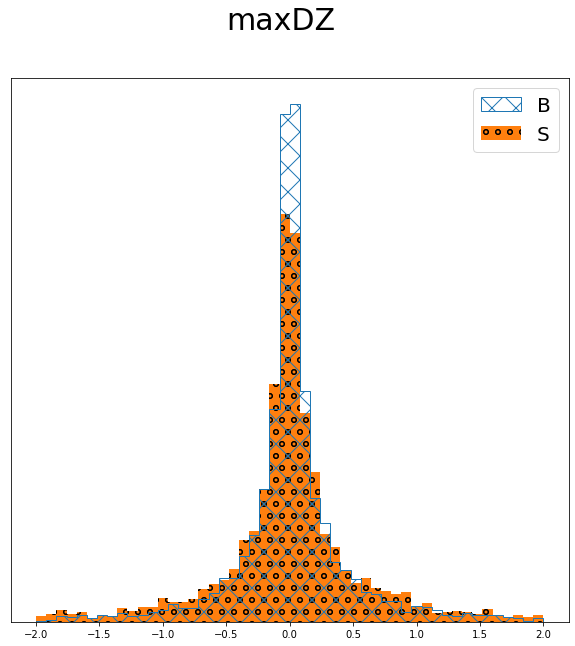

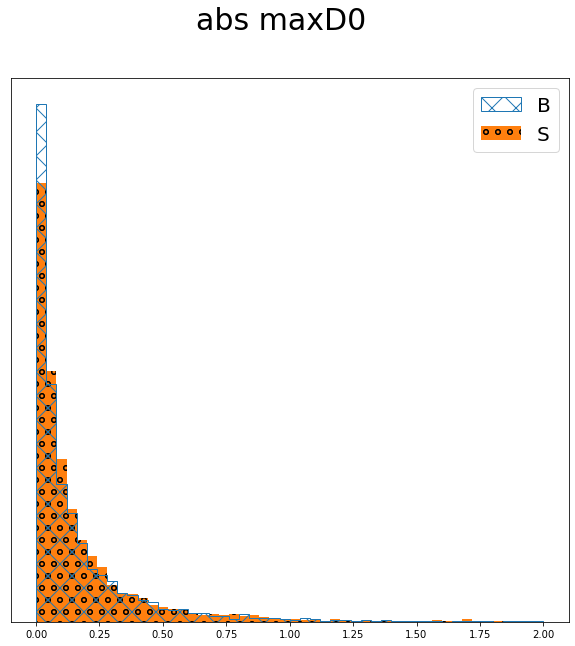

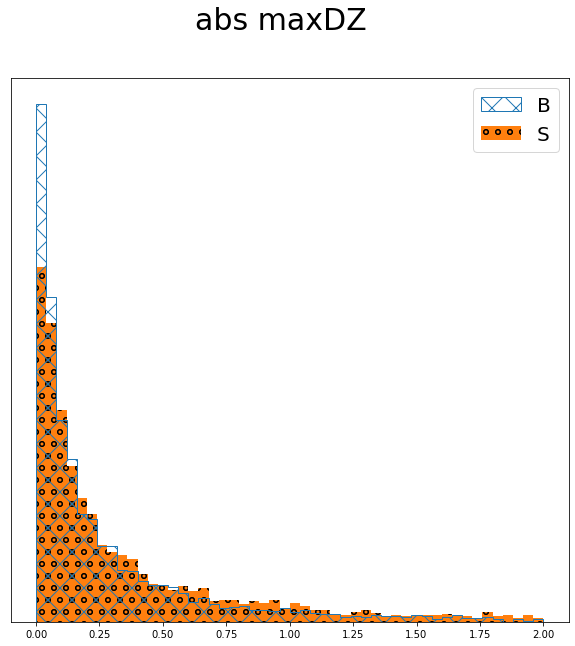

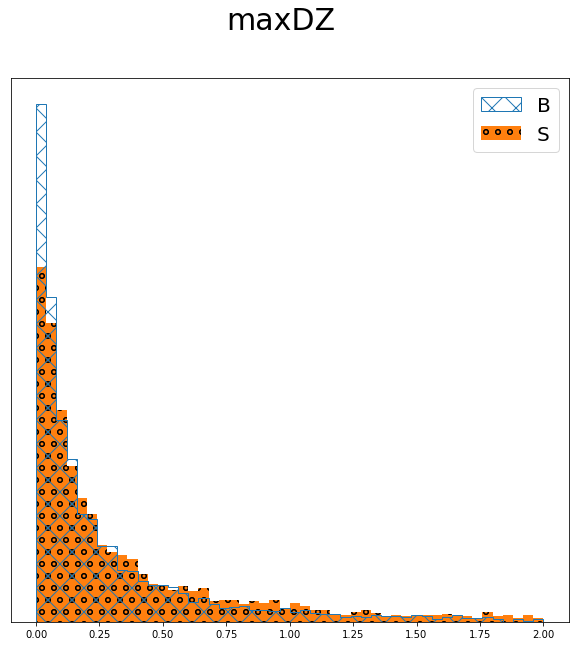

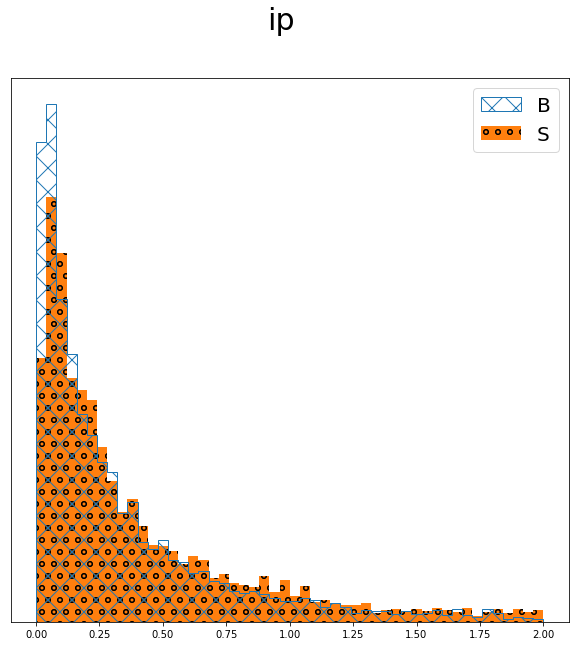

In [7]:
print(bkg_j[bkg_j["maxDZ"]>0].shape[0]/bkg_j.shape[0])
print(sig_j[sig_j["maxD0"]>0].shape[0]/sig_j.shape[0])

feat = "maxD0"
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(bkg_j[feat],bins=50,histtype="step",hatch="x", density=True, range=[-1,1]);
ax.hist(sig_j[feat],bins=50,histtype="stepfilled",hatch="o", density=True, range=[-1,1]);
ax.legend(["B","S"],fontsize=20)
ax.set_yticks([])
fig.suptitle(feat, size=30)

feat = "maxDZ"
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(bkg_j[feat],bins=50,histtype="step",hatch="x", density=True, range=[-2,2]);
ax.hist(sig_j[feat],bins=50,histtype="stepfilled",hatch="o", density=True, range=[-2,2]);
ax.legend(["B","S"],fontsize=20)
ax.set_yticks([])
fig.suptitle(feat, size=30)


feat = "maxD0"
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(np.abs(bkg_j[feat]),bins=50,histtype="step",hatch="x", density=True, range=[0,2]);
ax.hist(np.abs(sig_j[feat]),bins=50,histtype="stepfilled",hatch="o", density=True, range=[0,2]);
ax.legend(["B","S"],fontsize=20)
ax.set_yticks([])
fig.suptitle("abs " + feat, size=30)

feat = "maxDZ"
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(np.abs(bkg_j[feat]),bins=50,histtype="step",hatch="x", density=True, range=[0,2]);
ax.hist(np.abs(sig_j[feat]),bins=50,histtype="stepfilled",hatch="o", density=True, range=[0,2]);
ax.legend(["B","S"],fontsize=20)
ax.set_yticks([])
fig.suptitle("abs " + feat, size=30)


feat = "maxDZ"
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(np.abs(bkg_j[feat]),bins=50,histtype="step",hatch="x", density=True, range=[0,2]);
ax.hist(np.abs(sig_j[feat]),bins=50,histtype="stepfilled",hatch="o", density=True, range=[0,2]);
ax.legend(["B","S"],fontsize=20)
ax.set_yticks([])
fig.suptitle(feat, size=30)


feat = "ip"
fig, ax = plt.subplots(figsize=(10,10))
ax.hist((bkg_j["maxD0"]**2+bkg_j["maxDZ"]**2)**0.5,bins=50,histtype="step",hatch="x", density=True, range=[0,2]);
ax.hist((sig_j["maxD0"]**2+sig_j["maxDZ"]**2)**0.5,bins=50,histtype="stepfilled",hatch="o", density=True, range=[0,2]);
ax.legend(["B","S"],fontsize=20)
ax.set_yticks([])
fig.suptitle(feat, size=30)


# Tower multiplicity cut

In [70]:
bkg_eff = bkg_j_test[bkg_j_test.mult_tower_had>12].shape[0]/bkg_j_test.shape[0]
sig_eff = sig_j_test[sig_j_test.mult_tower_had>12].shape[0]/sig_j_test.shape[0]

print("sig_eff={}".format(sig_eff))
print("bkg_eff={}".format(bkg_eff))

sig_eff=0.5540047724100671
bkg_eff=0.033932067177250405


# DeltaR cut

In [77]:
bkg_eff = bkg_j_test[bkg_j_test.avgDeltaR>0.117].shape[0]/bkg_j_test.shape[0]
sig_eff = sig_j_test[sig_j_test.avgDeltaR>0.117].shape[0]/sig_j_test.shape[0]

print("sig_eff={}".format(sig_eff))
print("bkg_eff={}".format(bkg_eff))

sig_eff=0.5092971950835172
bkg_eff=0.04262114915684995


# XGBoost classifier

## Train/Validation split

In [10]:
feats = ["mult_track", "mult_tower_had","mult_tower_em", "Eta", "maxD0", "maxDZ", "avgDeltaR"]
#"PT", "Eta", "Phi","maxD0", "maxDZ",

val_frac = 0.2

data = pd.concat([sig_j,bkg_j.loc[range(sig_j.shape[0])]]).sample(frac=1).reset_index()

train_ind = np.arange(0,int(len(data)*(1-val_frac))) 
val_ind = np.arange(int(len(data)*(1-val_frac)),len(data))

X_train = data.loc[train_ind][feats]
y_train = data.loc[train_ind]["label"]

X_val = data.loc[val_ind][feats]
y_val = data.loc[val_ind]["label"]

print("num total examples = {}".format(len(data)))
print("num train examples = {}".format(len(X_train)))
print("num validate examples = {}".format(len(X_val)))

num total examples = 44248
num train examples = 35398
num validate examples = 8850


## Model

In [11]:
params = {'objective':'binary:logistic', 'n_estimators':500}
xgb_model= XGBClassifier(**params)

## Fit

In [12]:
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)] , early_stopping_rounds=15,verbose=True)
xgb_model.save_model("tree_WandB.txt")

[0]	validation_0-error:0.11998	validation_1-error:0.12588
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 15 rounds.
[1]	validation_0-error:0.11639	validation_1-error:0.12260
[2]	validation_0-error:0.11535	validation_1-error:0.12011
[3]	validation_0-error:0.11458	validation_1-error:0.11853
[4]	validation_0-error:0.11334	validation_1-error:0.11853
[5]	validation_0-error:0.11170	validation_1-error:0.11684
[6]	validation_0-error:0.11170	validation_1-error:0.11684
[7]	validation_0-error:0.11085	validation_1-error:0.11729
[8]	validation_0-error:0.10913	validation_1-error:0.11604
[9]	validation_0-error:0.10848	validation_1-error:0.11525
[10]	validation_0-error:0.10823	validation_1-error:0.11480
[11]	validation_0-error:0.10701	validation_1-error:0.11514
[12]	validation_0-error:0.10659	validation_1-error:0.11435
[13]	validation_0-error:0.10630	validation_1-error:0.11345
[14]	validation_0-error

In [13]:
xgb_model.feature_importances_

array([0.13954188, 0.7061769 , 0.07919084, 0.01865582, 0.01750723,
       0.0143641 , 0.02456328], dtype=float32)

## Evaluate

sig_eff=0.5051075754836377
bkg_eff=0.008438818565400843


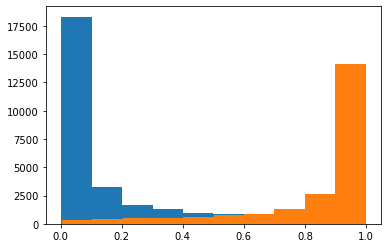

In [16]:
xgb_model.load_model("tree_WandB.txt")

thresh = 0.95

bkg_preds = xgb_model.predict_proba(bkg_j_test[feats])[:,1]
sig_preds = xgb_model.predict_proba(sig_j_test[feats])[:,1]
bkg_eff = sum(bkg_preds>thresh)/len(bkg_preds)
sig_eff = sum(sig_preds>thresh)/len(sig_preds)
print("sig_eff={}".format(sig_eff))
print("bkg_eff={}".format(bkg_eff))

plt.hist(bkg_preds, bins=10);
plt.hist(sig_preds, bins=10);

c:\users\noamw\desktop\jet_tagging\venv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Wall time: 1min 15s


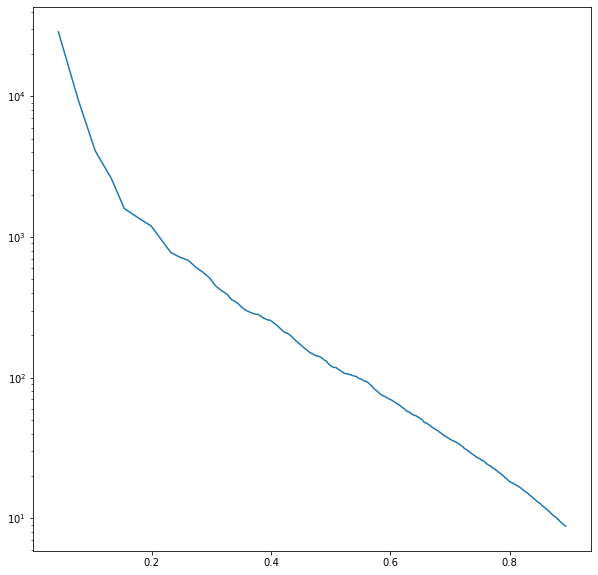

In [18]:
%%time
sig_eff = []
bkg_eff = []
frac = []
for thresh in (1-np.arange(0.001,0.5,0.001)):
    bkg_eff_temp = sum(bkg_preds>thresh)/len(bkg_preds)
    sig_eff_temp = sum(sig_preds>thresh)/len(sig_preds)
    sig_eff.append(sig_eff_temp)
    bkg_eff.append(1/bkg_eff_temp)
plt.semilogy(sig_eff,bkg_eff)    
plt.title("Boosted Tree")
plt.xlabel("Signal efficiency")
plt.ylabel("Background rejection")
plt.gcf().set_size_inches(10,10)